## 1. Import e Setup

In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Aggiungi il path del progetto
project_root = Path.cwd()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from models.yolo_detector import YOLODetector, visualize_detections
from config import Config

print(f"📂 Project root: {project_root}")
print(f"🎯 Number of classes: {Config.NUM_CLASSES}")
print(f"📦 YOLO model: {Config.YOLO_MODEL}")

📂 Project root: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation
🎯 Number of classes: 13
📦 YOLO model: yolov8n


## 2. Inizializza il Modello YOLOv8

**Nota**: I pesi pre-addestrati YOLOv8 saranno scaricati automaticamente e salvati in `checkpoints/pretrained/` invece che nella directory principale del progetto.

In [2]:
# Crea il detector
# I pesi pre-addestrati saranno salvati in checkpoints/pretrained/ invece che nella root
detector = YOLODetector(
    model_name=Config.YOLO_MODEL,
    pretrained=True,  # Usa i pesi pre-addestrati su COCO
    num_classes=Config.NUM_CLASSES,  # LineMOD ha 13 classi
    device='cpu'  # Cambia in 'cuda' se hai GPU, o 'mps' per Apple Silicon
)

# Mostra info sul modello
print(f"\n📊 Model Info:")
for key, value in detector.model_info.items():
    print(f"   {key}: {value}")

📥 Downloading pretrained yolov8n model to: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation/checkpoints/pretrained
💾 Weights saved to: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation/checkpoints/pretrained/yolov8n.pt
⚠️  WARNING: Using COCO pretrained weights (80 classes) for 13 classes
   You'll need to fine-tune or retrain for your custom dataset

📊 Model Info:
   model_name: yolov8n
   num_classes: 13
   device: cpu
   parameters: 3157200
   trainable_parameters: 0
💾 Weights saved to: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation/checkpoints/pretrained/yolov8n.pt
⚠️  WARNING: Using COCO pretrained weights (80 classes) for 13 classes
   You'll need to fine-tune or retrain for your custom dataset

📊 Model Info:
   model_name: yolov8n
   num_classes: 13
   device: cpu
   parameters: 3157200
   trainable_parameters: 0


## 3. Test su Immagine Singola del Dataset

📷 Immagine caricata: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation/data/Linemod_preprocessed/data/01/rgb/0000.png
   Shape: (480, 640, 3)


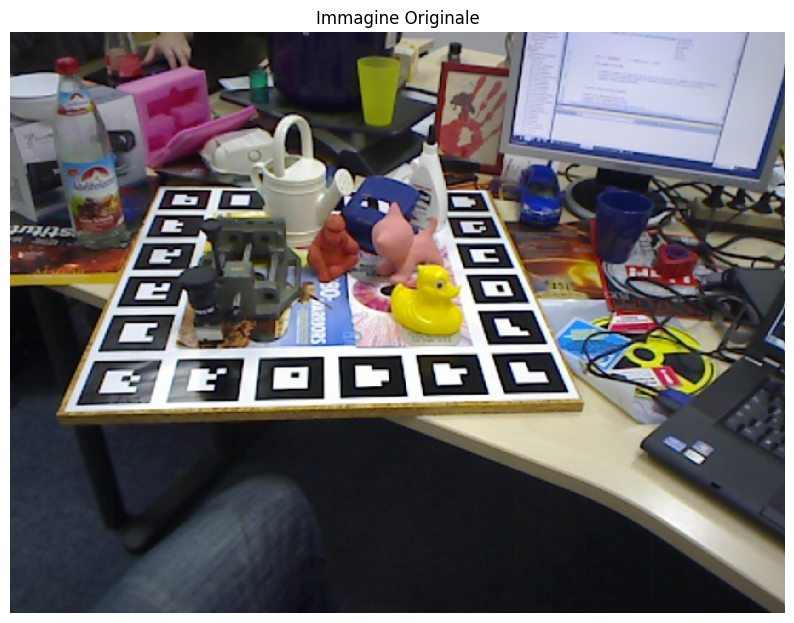

In [3]:
# Carica un'immagine dal dataset
dataset_root = Config.DATA_ROOT
sample_img_path = dataset_root / 'data' / '01' / 'rgb' / '0000.png'

if sample_img_path.exists():
    # Carica immagine
    image = np.array(Image.open(sample_img_path).convert('RGB'))
    
    print(f"📷 Immagine caricata: {sample_img_path}")
    print(f"   Shape: {image.shape}")
    
    # Visualizza immagine originale
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title("Immagine Originale")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Immagine non trovata: {sample_img_path}")
    print("   Assicurati di aver scaricato il dataset con il notebook local_dataset_test.ipynb")

## 4. Esegui Detection

In [4]:
if sample_img_path.exists():
    # Esegui detection
    print("\n🔍 Running object detection...")
    detections = detector.detect_objects(
        image=image,
        conf_threshold=Config.CONF_THRESHOLD
    )
    
    # Mostra risultati
    print(f"\n📦 Detected {len(detections)} objects:")
    for i, det in enumerate(detections):
        print(f"\n   Object {i+1}:")
        print(f"      Class: {det['class_name']} (ID: {det['class_id']})")
        print(f"      Confidence: {det['confidence']:.3f}")
        print(f"      BBox [x1,y1,x2,y2]: {det['bbox']}")


🔍 Running object detection...

📦 Detected 7 objects:

   Object 1:
      Class: tv (ID: 62)
      Confidence: 0.823
      BBox [x1,y1,x2,y2]: [      405.2     0.05275      639.83      131.14]

   Object 2:
      Class: keyboard (ID: 66)
      Confidence: 0.773
      BBox [x1,y1,x2,y2]: [     519.93      265.89      639.75      424.91]

   Object 3:
      Class: bottle (ID: 39)
      Confidence: 0.702
      BBox [x1,y1,x2,y2]: [     35.338      20.213      96.165      175.18]

   Object 4:
      Class: cup (ID: 41)
      Confidence: 0.696
      BBox [x1,y1,x2,y2]: [     482.76      130.03      532.74      192.36]

   Object 5:
      Class: cup (ID: 41)
      Confidence: 0.684
      BBox [x1,y1,x2,y2]: [     285.47      19.788      326.21      79.445]

   Object 6:
      Class: cup (ID: 41)
      Confidence: 0.368
      BBox [x1,y1,x2,y2]: [     200.06      103.36      273.44      176.32]

   Object 7:
      Class: person (ID: 0)
      Confidence: 0.359
      BBox [x1,y1,x2,y2]: [     5

## 5. Visualizza Detections

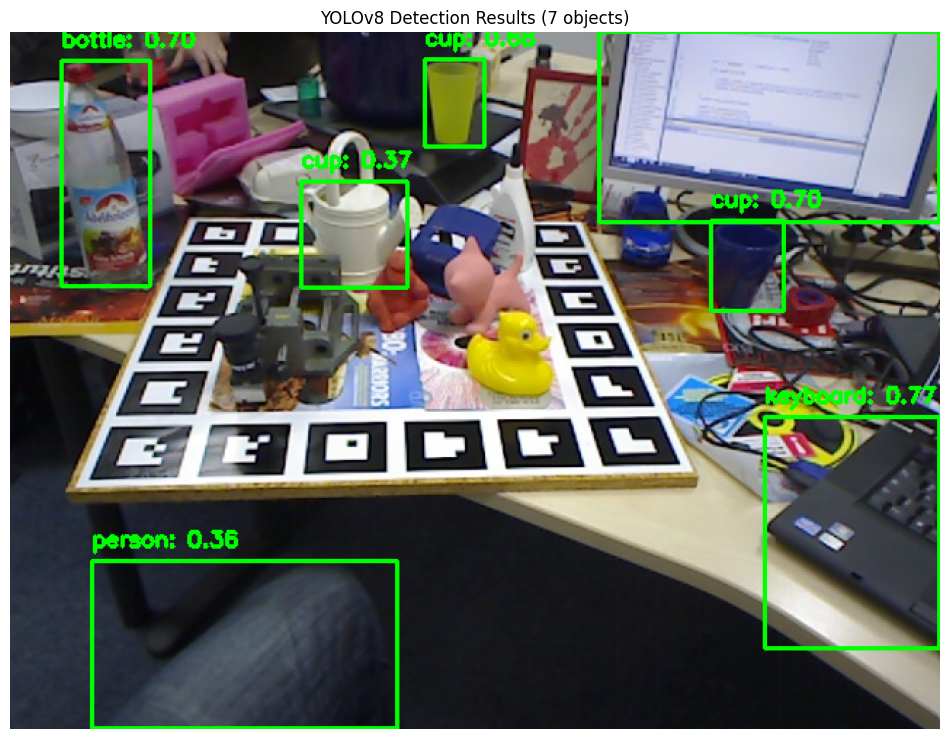

In [5]:
if sample_img_path.exists() and len(detections) > 0:
    # Visualizza detections
    vis_image = visualize_detections(image, detections)
    
    # Mostra risultato
    plt.figure(figsize=(12, 12))
    plt.imshow(vis_image)
    plt.title(f"YOLOv8 Detection Results ({len(detections)} objects)")
    plt.axis('off')
    plt.show()
elif sample_img_path.exists():
    print("⚠️  Nessun oggetto rilevato. Prova ad abbassare il conf_threshold.")

## 6. Test su Multiple Immagini

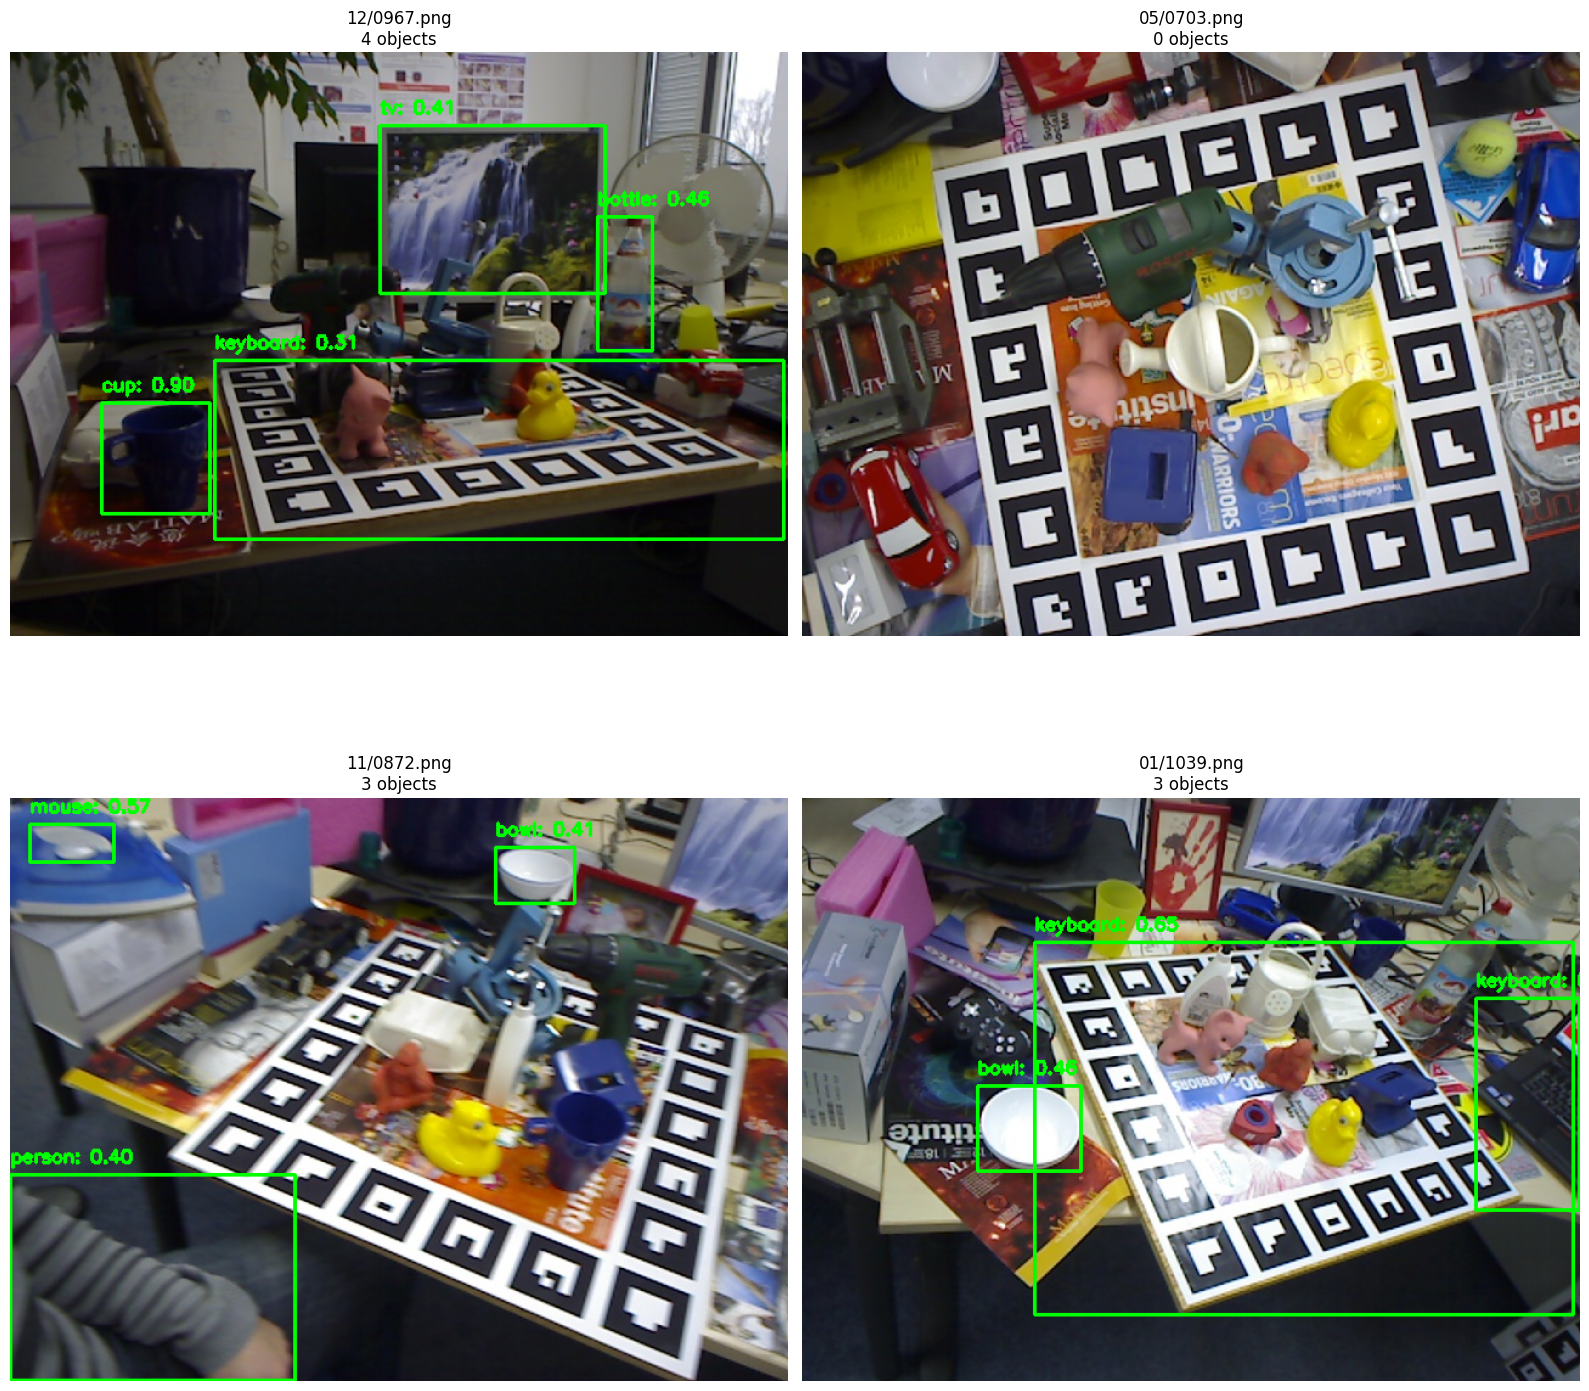

In [6]:
# Test su più immagini
import random

# Trova tutte le immagini RGB
rgb_images = list((dataset_root / 'data').rglob('rgb/*.png'))

if len(rgb_images) > 0:
    # Seleziona 4 immagini random
    sample_images = random.sample(rgb_images, min(4, len(rgb_images)))
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 16))
    axes = axes.flatten()
    
    for idx, img_path in enumerate(sample_images):
        # Carica e processa immagine
        img = np.array(Image.open(img_path).convert('RGB'))
        dets = detector.detect_objects(img, conf_threshold=0.3)
        
        # Visualizza
        vis_img = visualize_detections(img, dets)
        axes[idx].imshow(vis_img)
        axes[idx].set_title(f"{img_path.parent.parent.name}/{img_path.name}\n{len(dets)} objects")
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ Nessuna immagine trovata nel dataset")

## 7. Prossimi Passi

### Per il Training Personalizzato:

1. **Prepara il dataset in formato YOLO**:
   - Crea un file `data.yaml` con la struttura del dataset
   - Converte le annotazioni in formato YOLO (bbox normalizzate)

2. **Addestra il modello**:
   ```python
   detector.train(
       data_yaml='path/to/data.yaml',
       epochs=100,
       batch_size=16
   )
   ```

3. **Estendi per la rotazione**:
   - Modifica l'architettura YOLOv8 per predire anche rotazione
   - Aggiungi un head personalizzato per la rotazione 3D

### Note:
- Attualmente YOLOv8 usa pesi pre-addestrati su COCO (80 classi)
- Per LineMOD (13 oggetti specifici) dovrai fare fine-tuning o training da zero
- Il modello baseline serve come confronto per la versione estesa con rotazione